In [5]:
%matplotlib inline
from daomath.daomechanics import VectorField
from daomath.daomechanics import MaterialPoint
from daomath.ground import Ground
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import numpy as np

# Physics Engine Implementation 

#### AUTHOR : <br> David Stankov

### ABSTRACT <br>
   Solving of the system non-linear differential equations using LeapFrog algorithm.So we will able to to calculate the body's motion according second principle of mechanics We will visualize the motions  by Python lib  pyplot,thus we will attain more understanding of what is vector field ,the innitial values ploblems and so on.In addition we will show the law of conservation of energy

### INTRODUCTION
The priciple of meachanics defined by Nuton,help up to calculate and predict the motion of body when we known the force wich act on it and its inition values of velosaty and radius vector

### Vector Field </br>
Vector field in two dimensions is a function that assigns to each point (x,y) of the xy-plane a two-dimensional vector F(x,y). The standard notation is  $$\vec{F}(x,y) = V(x,y).\vec{i} + Q(x,y).\vec{j}  $$ </br>
 
The most famous example is force on Earh'surface $$\vec{G}(x,y) = 0.\vec{i} -g.\vec{j}$$. where $$  g=9.8(\frac{m}{s^2})    $$ found by Galileo Galilei.<br>
Let's  visualise this vector field using 'matplotlib.pyplot' and Vector Field where its implementation can be found in folder daomath\mechanics in project
 

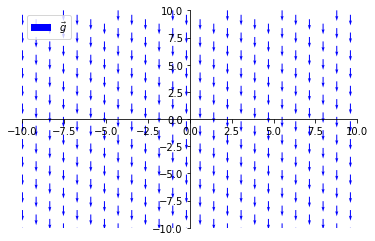

In [2]:
f = VectorField(lambda t,x,y : 0 , lambda t,x,y : -9.8)
f.plot_field(reduce=8,scale=10,width=0.003,label=r'$\vec{g}$')
plt.show()

Other Field : $$\vec{F}(x,y) = -x.\vec{i} -y.\vec{j}$$ : 

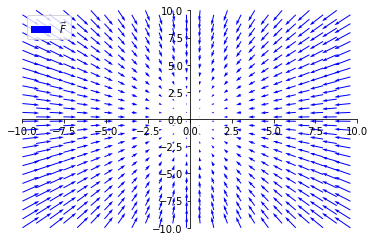

In [3]:

f = VectorField(lambda t,x,y : -x , lambda t,x,y : -y)
f.plot_field(reduce=4,scale=10,width=0.003)

plt.show()

### Second principle of mechanics : 
 $$1) \frac{d\vec{p}}{dt} = \frac{m.d^2\vec{r(t)}}{dt^2}=\frac{m.\vec{dv}(t,\vec{r})}{dt}=\frac{m.\vec{a}(t,\vec{r})}{dt}=\vec{F}(\vec{r},t)$$ </br> 
 where $$\vec{r}(radious-vector),\vec{a}(accelaration),\vec{v}(velosity),\vec{F}(force)  \in E^3 $$ E-euclidian vector  space   is radious .The low can be difined as $$$$ 
 In an inertial frame of reference, the vector sum of the forces F on an object is equal to the mass m of that object multiplied by the acceleration a of the object: F = ma.
The equation 1) is six order system ODE.For solution of the equations we will use Leapfrog integration ,because the algorithms is more stable than Euler's method especially in oscillatory motion

 The motion of the body on wich acts $$\vec{F}(x,y) = 0.\vec{i} -g.\vec{j}$$ and
Initial Velocity  is $$ \vec{v_0} = 20.cos(45^{\circ})\vec{i} +cos (sin^{\circ})\vec{j}  $$ 

The solving of differcial eqation is verry simple $$\int{\vec{v}dt} =  \int{0.dt}.\vec{i} -\int{g.dt}.\vec{j} + \int{\vec{v_0}dt} = 20.cos45^{\circ}.\vec{i} + (20.sin45^{\circ}-g.t).\vec{j} $$
$$ \int{d\vec{r}(t)} = \int{\vec{v}dt} =20.sin45^{\circ}.t.\vec{i} + (20.cos45^{\circ}-g).t^2.\vec{j} + \vec{r_0}$$
Let's visualise this motion

17


<Figure size 432x432 with 0 Axes>

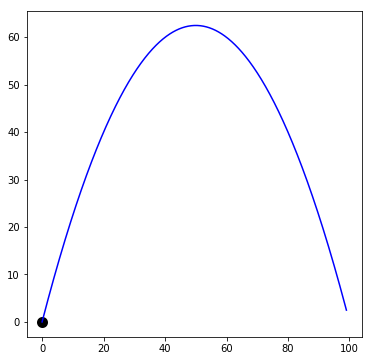

In [4]:
fig = plt.figure(figsize=(6, 6))
fig = plt.figure(figsize=(6, 6))

u = lambda t, x, y: 0
v = lambda t, x, y: -10
point = MaterialPoint(x0=0, y0=0, mass=1)
f = VectorField(u, v)
point.add_force(f)
z = point.calculate_radius_vector(20*np.cos(np.pi/4), +50*np.sin(np.pi/4),n=700)
plt.plot(z[:,0],z[:,1])
size = int(point.get_size(40))
print(size)



anim = animation.FuncAnimation(plt.gcf(), point.update_HTML_animation,interval=100,fargs=(fig,),frames=size, blit=False)
HTML(anim.to_html5_video())

let's to see radius vector

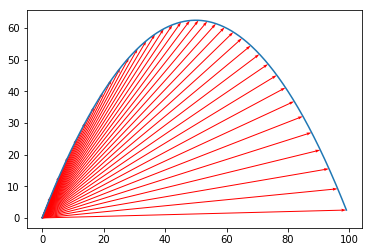

In [5]:

plt.plot(z[:,0],z[:,1])

point.plot_radios_vector()

if we change the the initial  velosity for exampe (0,50) we will see

<Figure size 432x432 with 0 Axes>

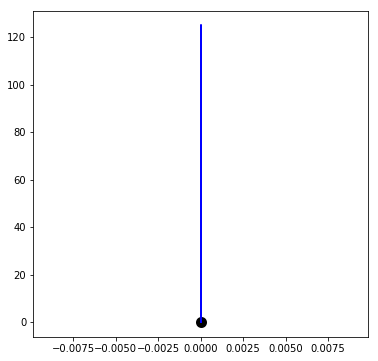

In [6]:
fig = plt.figure(figsize=(6, 6))
fig = plt.figure(figsize=(6, 6))
z = point.calculate_radius_vector(0, 50,n=1000)
plt.plot(z[:,0],z[:,1])
size = int(point.get_size(20))
anim = animation.FuncAnimation(plt.gcf(), point.update_HTML_animation,interval=100,fargs=(fig,),frames=size, blit=False)
HTML(anim.to_html5_video())

<Figure size 432x432 with 0 Axes>

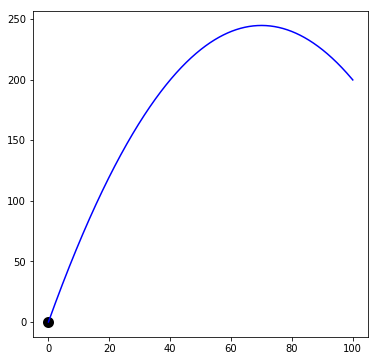

In [7]:
fig = plt.figure(figsize=(6, 6))
fig = plt.figure(figsize=(6, 6))
z = point.calculate_radius_vector(10, 70,n=1000)
plt.plot(z[:,0],z[:,1])
size = int(point.get_size(20))
anim = animation.FuncAnimation(plt.gcf(), point.update_HTML_animation,interval=100,fargs=(fig,),frames=size, blit=False)
HTML(anim.to_html5_video())


Gravity $$\vec{G}= - \frac{M.m.x}{(x^2+y^2)^{3/2}}\vec{i} -\frac{M.m.y}{(x^2+y^2)^{3/2}}\vec{j} $$ Where F is the force, m1 and m2 are the masses of the objects interacting,we will consider the equation in more  simplified
 case where the M is times greater then m is  with initial values $$ x_0= 10 , y_0 =10, v_1 = -1.cos45^{\circ}, v_2 = -4.sin45^{\circ}$$

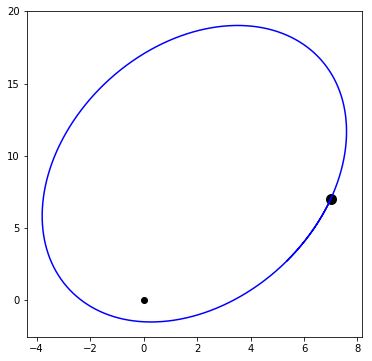

In [8]:
fig = plt.figure(figsize=(6, 6))
point = MaterialPoint(x0=10,y0=10)
# z = point.calculate_radius_vector(3,4)
# anim = animation.FuncAnimation(fig, point.update_HTML_animation, fargs=(Q, X, Y),
#                                interval=50, blit=False)
u = lambda t, x, y: -80 * x / ((x ** 2 + y ** 2) ** (3 / 2))
v = lambda t, x, y: -80 * y / ((x ** 2 + y ** 2) ** (3 / 2))
point = MaterialPoint(x0=7, y0=7, mass=1)
f = VectorField(u, v)
point.add_force(f)
z = point.calculate_radius_vector(-1*np.cos(np.pi/4), -4*np.sin(np.pi/4),5000,h=0.005)
plt.plot(z[:,0],z[:,1])
size = int(point.get_size(100))
anim = animation.FuncAnimation(fig, point.update_HTML_animation,interval=50,fargs=(fig,),frames=size, blit=False)
HTML(anim.to_html5_video())

we can notice that the velocity near to center (0,0) is most fast
if we change $$ v_1=-10.cos45^{\circ}, v_2 = -5.sin45^{\circ}$$

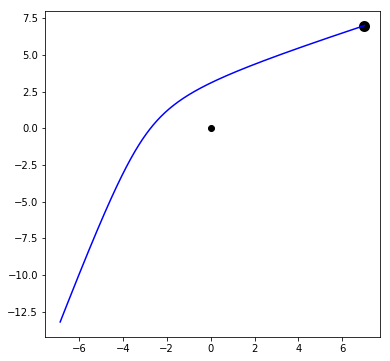

In [9]:
fig = plt.figure(figsize=(6, 6))
point = MaterialPoint(x0=10,y0=10)
# z = point.calculate_radius_vector(3,4)
# anim = animation.FuncAnimation(fig, point.update_HTML_animation, fargs=(Q, X, Y),
#                                interval=50, blit=False)
u = lambda t, x, y: -80 * x / ((x ** 2 + y ** 2) ** (3 / 2))
v = lambda t, x, y: -80 * y / ((x ** 2 + y ** 2) ** (3 / 2))
point = MaterialPoint(x0=7, y0=7, mass=1)
f = VectorField(u, v)
point.add_force(f)
z = point.calculate_radius_vector(-10*np.cos(np.pi/4), -5*np.sin(np.pi/4),n=1000,h=0.003)
plt.plot(z[:,0],z[:,1])
size = int(point.get_size(100))
anim = animation.FuncAnimation(fig, point.update_HTML_animation,interval=50,fargs=(fig,),frames=size, blit=False)
HTML(anim.to_html5_video())

we can notice that the body is  gone to out of orbit and just  passed  near to source of gravity .because the force is not strong enought to  change the initial velocity.<br>
In the last example will be shown how the stability of  LeapFrog integration , when we  change the intergration step h = 0.5 

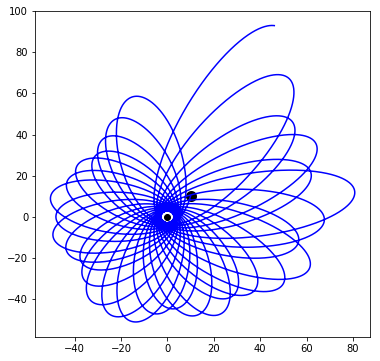

In [10]:
fig = plt.figure(figsize=(6, 6))
point = MaterialPoint(x0=10,y0=10)
# z = point.calculate_radius_vector(3,4)
# anim = animation.FuncAnimation(fig, point.update_HTML_animation, fargs=(Q, X, Y),
#                                interval=50, blit=False)
u = lambda t, x, y: -80 * x / ((x ** 2 + y ** 2) ** (3 / 2))
v = lambda t, x, y: -80 * y / ((x ** 2 + y ** 2) ** (3 / 2))
point = MaterialPoint(x0=10, y0=10, mass=1)
f = VectorField(u, v)
point.add_force(f)
z = point.calculate_radius_vector(-1*np.cos(np.pi/4), -4*np.sin(np.pi/4),7000,h=0.5)
plt.plot(z[:,0],z[:,1])
size = int(point.get_size(100))
anim = animation.FuncAnimation(fig, point.update_HTML_animation,interval=50,fargs=(fig,),frames=size, blit=False)
HTML(anim.to_html5_video())

Wow!!! <br>
We've attain  the entirely different result.
The error growth factor is increased when the integration factor also increase . After many oscillation this error become enormous

### Work ,Energy  and Potencial Field


Work is the product of force and distance. In physics, a force is said to do work if, when acting, there is a movement of the point of application in the direction of the force.
For example, when a ball is held above the ground and then dropped, the work done on the ball as it falls is equal to the weight of the ball. 
The work of system by definition is integral of dW where  $$  dW =  \vec{F}.d\vec{r} = m.\vec{a}.d\vec{r}$$
######  
1) $$\vec{F}.d\vec{r} = m.\vec{a}.d\vec{r}=m.\frac{\vec{v}} {dt}.\vec{v}.dt=m.\vec{v}.d\vec{v}$$
2) from 1 we have $$\vec{F}.d\vec{r}=m.\vec{v}.d\vec{v} \Leftrightarrow \int m.\vec{F}.d\vec{r} =\int m.\vec{v}.d\vec{v}  \Leftrightarrow \frac{m.v^2}{2} - \frac{m.v_0^2}{2}  =  V(\vec{r}) - V_0(\vec{r}) \Leftrightarrow \triangle T = \triangle V $$ 

T is kinetic V potential energy $$E + U = H$$ H is called total energy of system also  Hamilton 
$$grad\vec{F}=\vec{\triangledown}.U = \vec{F}$$

accordingly  theorem of Green if $$ \int_C \vec{\triangledown}  \times \vec{F}=0$$ then then the vector field is potential and satisfy  $$grad\vec{F}=\vec{\triangledown}.U = \vec{F}$$

## The Law of conversations
For the first time in above example,we've saw the low of conservation .How does kinetic energy is transformed to potential energy and inverse process is the same .The most famous example is gravity on earth's surface:    
$$m.g.y - m.g.y_o = E - E_0 \Leftrightarrow E = H - m.g.y$$

There are many kinds of transformation of energy ,maybe that is the most deeply and fundamental law in physics.
Let's  see other kind of conversation - The Law of Momentum Conservation
Consider a collision between two objects.-obeject 1 and object 2 
Newton's third law says the force in moment of collision between obj1 and obj2 is equal in their magnitude and opposite in their direction
$$ 1)\vec{F_{12}} = - \vec{F_{21}}$$      

let's multiple  equation 1) with dt and after that we can   integrate it  $$\vec{F_{12}} = - \vec{F_{21}}  $$
    $$\vec{F_{12}}.dt = - \vec{F_{21}}.dt \Leftrightarrow  m.\vec{a_{12}}.dt  -m.\vec{a_{21}}.dt \Leftrightarrow \int m.\vec{a_{1}}.dt =\int m.\vec{a_{2}}.dt = m.\vec{v_{1}}.dt + m.\vec{v_{2}} \Leftrightarrow  \vec{p_{1}} + \vec{p_{2}} =\vec{p}$$
The conclusion from above operation is after collision the total momentum of system remains the sameThe conclusion from above operation is  after collision the total momentum of system   ramains the same 

Let  see what 's happens with energy conversation:
After the multiplacation of eaqution 1) on  both sides with $$\vec{dr}$$  and integration we achieve the  result
$$\vec{F_{12}}.d\vec{r} =-\vec{F_{21}}.d\vec{r} = T_{12} + T_{21} = H $$
The total energy between two particle remains the same.This result can be summarise for many particul

Let's see visualization of collision between to body 

<Figure size 432x432 with 0 Axes>

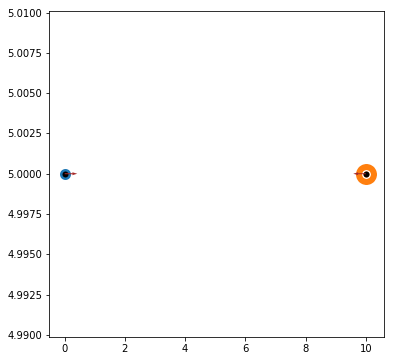

In [6]:
fig = plt.figure(figsize=(6, 6))
fig = plt.figure(figsize=(6, 6))
g = Ground()
g.add_point(MaterialPoint(x0=0, y0=5, mass=5, v_x0=3, v_y0=0))
g.add_point(MaterialPoint(x0=10, y0=5, mass=15, v_x0=-3, v_y0=0))

g.calculate_speed_points(end_time=80)
points = g.points

size = len(g.points[0].x_args)
anim = animation.FuncAnimation(fig, g.update_HTML_animation,interval=80,fargs=(fig,),frames=size, blit=False)
HTML(anim.to_html5_video())

After the collion we can notice that the red ball is smaller velositt before colion,
because its mass greater than blue ball.
That fact comes from  The fact $$H  = E_1+E_2 , E_i=\frac{H}{2} $$ and    $$v =\sqrt{ \frac{E}{2*m}} $$ The more mass gives less velocity

<Figure size 432x432 with 0 Axes>

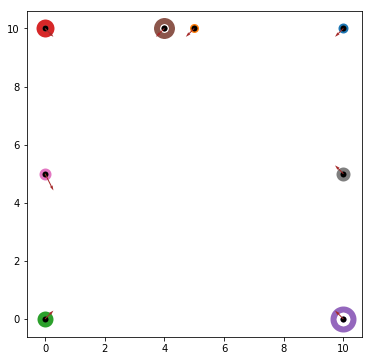

In [7]:
fig = plt.figure(figsize=(6, 6))
fig = plt.figure(figsize=(6, 6))
g = Ground()
g.add_point(MaterialPoint(x0=10, y0=10, mass=4, v_x0=-2, v_y0=-2))
g.add_point(MaterialPoint(x0=5, y0=10, mass=3, v_x0=-2, v_y0=-2))
g.add_point(MaterialPoint(x0=0, y0=0, mass=10, v_x0=2, v_y0=2))
g.add_point(MaterialPoint(x0=0, y0=10, mass=12, v_x0=2, v_y0=-2))
g.add_point(MaterialPoint(x0=10, y0=0, mass=20, v_x0=-2, v_y0=2))
g.add_point(MaterialPoint(x0=4, y0=10, mass=15, v_x0=-2, v_y0=-2))

g.add_point(MaterialPoint(x0=0, y0=5, mass=6, v_x0=2, v_y0=-4))
g.add_point(MaterialPoint(x0=10, y0=5, mass=8, v_x0=-2, v_y0=2))
g.calculate_speed_points(end_time=100)
points = g.points

size = len(g.points[0].x_args)
anim = animation.FuncAnimation(fig, g.update_HTML_animation,interval=40,fargs=(fig,),frames=size, blit=False)
HTML(anim.to_html5_video())

The total energy of closed mechanics system in which does not act any external forces remains the same
$$\frac{dH}{dt}=\sum{\frac{dE_i}{dt}} = 0 \Leftrightarrow H=Const $$

REFERENCES: <br> 
[1] https://en.wikipedia.org/wiki/Work_(physics) <br>
[2] Numerical Methods for Solving Systems of Nonlinear Euqtions by Courtney Remani <br>
[3] http://www.astro.utu.fi/~cflynn/galdyn/lecture6.html?fbclid=IwAR31E-ezjjqEmMxxui7CkpEjrc32ACuMErAHQgK1sSsaifNRv2ss3FcPGaY <br>
[4] https://www.quora.com/What-is-the-relationship-between-mass-and-velocity <br>
[5] Stability of the Leapfrog/Midpoint Method
